---
# Cairo University Faculty of Engineering
## Machine Learning
## Assignment 5

---

Please write your full name here
- **Name** : محمد هاشم عبدالوارث

# Clustering

In this assignment, you will be exploring kmeans algorithms for clustering

--------------------

The k-means clustering is first given the wanted number of clusters, say k, as a hyperparameter. Next, to start the algorithm, k points from the data set are chosen randomly as cluster centres. Then the following phases are repeated iteratively:

- any data point is set to belong to a cluster, whose centre is closest to it
- then for each cluster a new centre is chosen as the average of the data points in the cluster
This procedure is repeated until the clusters no longer change. This kind of algorithm is called an Expectation-Maximization (EM) algorithm, which is known to converge.

In [ ]:
from sklearn.datasets import make_moons, make_blobs
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
X, y = make_moons(n_samples=250, noise=0.05, random_state=42)

# Question 0
Set random seed to 47

In [ ]:
np.random.seed(47)


# Question 1
Scatter plot the dataset

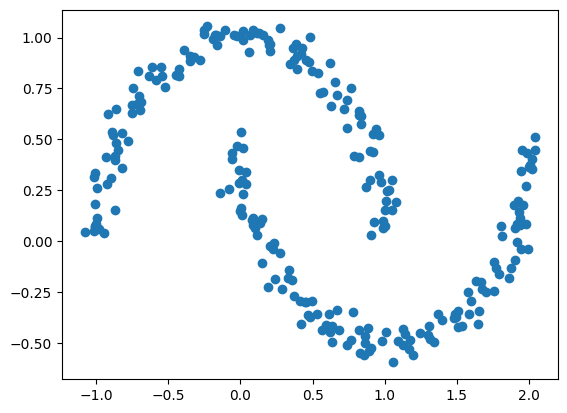

In [ ]:
X.shape
X[:,0]
X[:,1]
plt.scatter(X[:,0],X[:,1])

# Question 2
In your opinon, how well will K-Means perform on the above dataset? Explain.

ANSWER: the Kmeans algorithm is expected to do well on this  data set because the original data contains two distinct clusters with obviously different means but the algorithm might not do as well with some of the corner points of each cluster as they are closer to the other cluster mean/center


# Question 3
1. Use Elbow method to find best "k". (Use inertia as metric).
2. Plot the elbow graph.
3. Train SKlearn KMeans model using "k = 2".
4. Scatter plot the data after clustering with colors
5. **Comment on the results.**

ANSWER: the elbow point of the graph (where the graph changes from high slope to lower slope) is at 2 clusters which we expected from visualizing the data, as the smaller the value of inertia is the more coherent the clusters are we find a relatively small value at 2 which keeps decreasing with the increasing clusters as we consider less numbers of points together but it does not indicate a further improvement in performance/clustering.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0.5, 1.0, 'Elbow method using inertia')

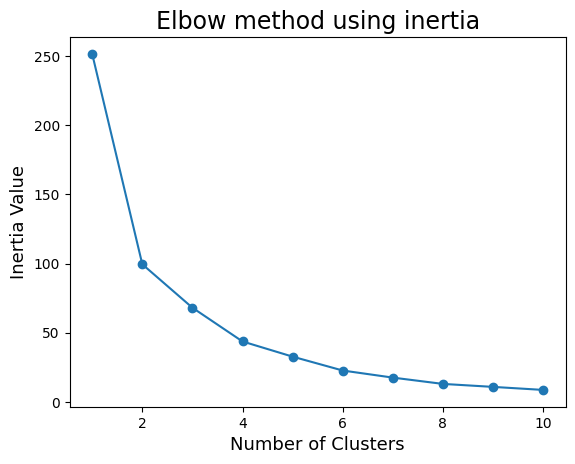

In [ ]:
inertia_list = []
for num_clusters in range(1, 11):
    kmeans_model = KMeans(n_clusters=num_clusters)
    kmeans_model.fit(X)
    inertia_list.append(kmeans_model.inertia_)
plt.plot(range(1,11),inertia_list)
plt.scatter(range(1,11),inertia_list)
plt.xlabel("Number of Clusters", size=13)
plt.ylabel("Inertia Value", size=13)
plt.title("Elbow method using inertia", size=17)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


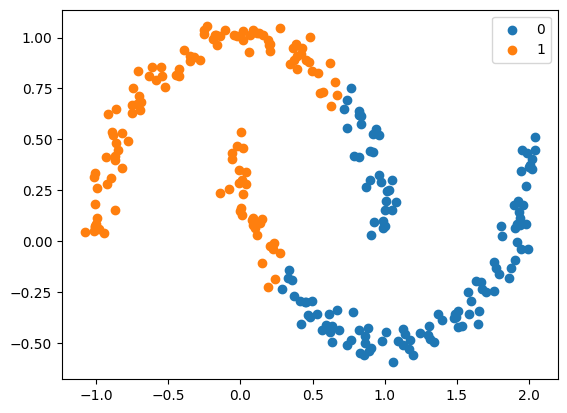

In [ ]:
kmeans_model = KMeans(n_clusters=2)
kmeans_model.fit(X)
label = kmeans_model.fit_predict(X)
    #Getting unique labels

u_labels = np.unique(label)

#plotting the results:

for i in u_labels:
    plt.scatter(X[label == i , 0] , X[label == i , 1] , label = i)
plt.legend()
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.3).fit(X)
labels = db.labels_
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

- Try DBSCAN algorithm on the same data with eps = 0.3
- Scatter plot the resulting clusters

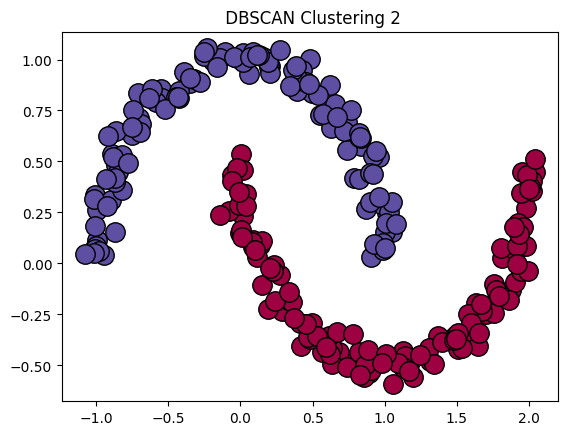

In [ ]:
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f" DBSCAN Clustering {n_clusters_}")
plt.show()

**Compare between DBSCAN and kmeans results on the same data. Why do you think you got those results??**

ANSWER: the DBSCAN algorithm clusters the data better because the k means algorithms reliers on a distance metric typically the euclidean distance (between the point and cenrtroid)  to cluster the data so it fails at the edges of the clusters curves to identify the points as part of the correct cluster, while DBSCAN method uses a neighborhood density metric where each radius of a given cluster must contain a certain number of points.

# Question 4
For the following dataset
1. Run kmeans algorithm clustering using k=2.
3. Plot results of algorithm.
4. Comment on the following
    * Why do kmeans fail to cluster such data?

ANSWER: the Kmeans algorithm fails due to depending on a euclidean distance metric to identify points in clusters as it expects diferrent clusters centroids to be far from each other so here it fails and identifies other cluster points as part of another cluster because they are closer to its center.
the algorithm is also sensitive to the shape of the clusters as assumes that the clusters are spherical However, in our dataset, the clusters are elongated  This makes it difficult for k-means to identify the correct clusters, as it tends to assign points to the nearest cluster center

Text(0.5, 1.0, 'original data')

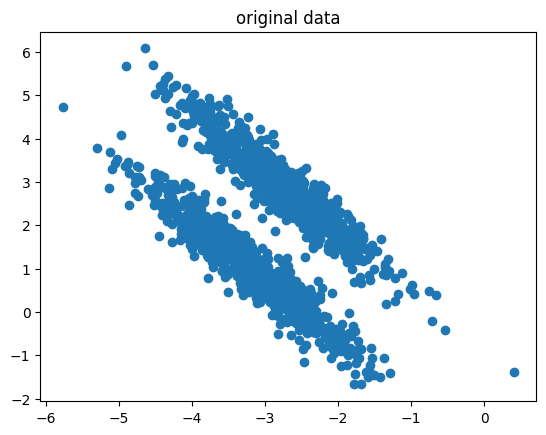

In [ ]:
n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state, centers=2)
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
plt.scatter(X_aniso[:,0],X_aniso[:,1])
plt.title('original data')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


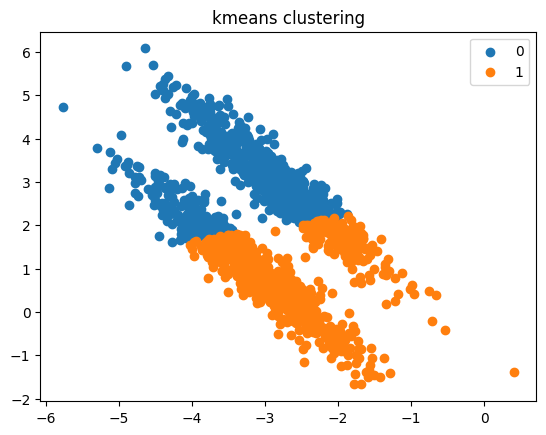

In [ ]:
kmeans_model = KMeans(n_clusters=2)
kmeans_model.fit(X_aniso)
label = kmeans_model.fit_predict(X_aniso)
    #Getting unique labels

u_labels = np.unique(label)

#plotting the results:

for i in u_labels:
    plt.scatter(X_aniso[label == i , 0] , X_aniso[label == i , 1] , label = i)
plt.legend()
plt.title('kmeans clustering')
plt.show()

# Question 5
Write your own K-means clustering from scratch, where the Euclidian distance is used to evaluate
the distance/ similarity between the dataset. The input to this function should be:
* The number of clusters
* The dataset

The output should be:
* The list of cluster centers

In [ ]:
import numpy as np

def k_means_clustering(k, dataset):
    # initialize k cluster centers randomly
    cluster_centers = dataset[np.random.choice(dataset.shape[0], k, replace=False), :]
    while True:
        # assign each data point to the nearest cluster center
        distances = np.sqrt(np.sum((dataset[:, np.newaxis, :] - cluster_centers)**2, axis=2))
        cluster_assignments = np.argmin(distances, axis=1)

        # update the cluster centers
        new_cluster_centers = np.array([np.mean(dataset[cluster_assignments == i], axis=0) for i in range(k)])

        # check for convergence
        if np.allclose(cluster_centers, new_cluster_centers):
            break

        cluster_centers = new_cluster_centers

    return cluster_centers

# Question 6
For the following dataset:

In [ ]:
from sklearn.datasets import make_blobs
X,y = make_blobs(centers=4, n_samples=200, random_state=0, cluster_std=0.7)
print(X[:10],y[:10])

[[ 2.26403424  1.82613379]
 [-0.97647444  2.59138889]
 [ 1.10046838  4.02254067]
 [-2.82715074  7.11970523]
 [ 1.53393915  0.31915668]
 [ 0.98362009  5.55389667]
 [-1.74452433  2.98606238]
 [ 0.35482006  2.9172298 ]
 [ 1.83747356  5.14545322]
 [ 1.48663347  4.39407536]] [1 2 0 3 1 0 2 0 0 0]


- Scatter plot the data **without** coloring the points using labels.
- How many clusters do you see?

ANSWER: I see 4 clusters

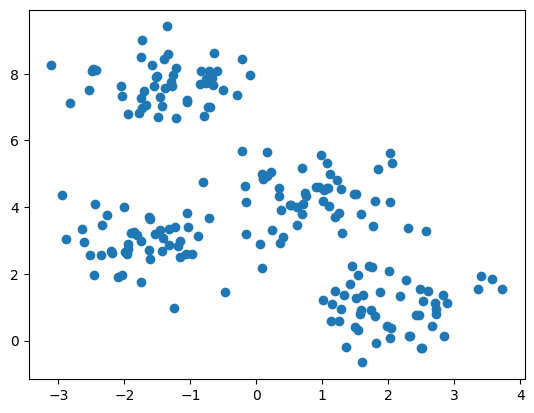

In [ ]:
plt.scatter(X[:,0],X[:,1])

# Question 7

- Use sklearn kmeans to cluster the ABOVE data with k = the number you chose in the above question
    - Print the clusters centers
    - Scatter plot the data and use the labels **predicted** by the model to color the points --> you should have as many colors in the plot as clusters
    - On the same plot, show the cluster centers

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[-1.36512238  7.70188306]
 [ 2.07464749  0.9869902 ]
 [-1.70639178  2.9104771 ]
 [ 0.86008475  4.31501411]]


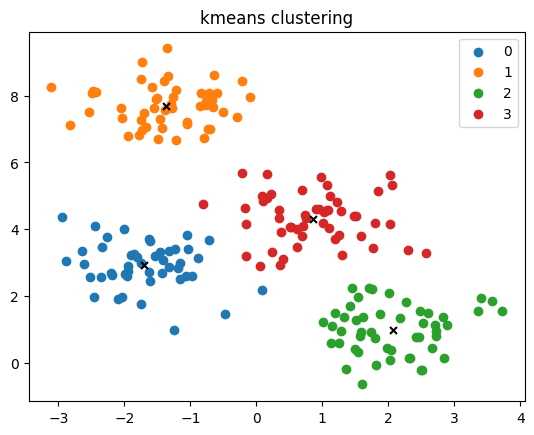

In [ ]:
kmeans_model = KMeans(n_clusters=4)
kmeans_model.fit(X)
centers=kmeans_model.cluster_centers_
print(centers)
label = kmeans_model.fit_predict(X)
    #Getting unique labels

u_labels = np.unique(label)

#plotting the results:

for i in u_labels:
    plt.scatter(X[label == i , 0] , X[label == i , 1] , label = i)
  # marker centers are black X on the plot
for center in centers:
  plt.scatter(center[0],center[1],marker='x',s=25,c='black')
plt.legend()
plt.title('kmeans clustering')
plt.show()



- Calculate the accuracy score between kmeans prediction and the true blobs labels

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y, label)
print(y,'\n',label)
print(accuracy_score(y, label))


[1 2 0 3 1 0 2 0 0 0 0 1 2 2 1 0 3 3 3 1 3 2 1 2 1 1 3 1 1 0 3 0 2 1 2 0 2
 0 0 3 3 3 3 0 1 2 0 3 3 0 3 2 2 3 0 3 2 1 0 1 3 0 1 0 3 0 1 3 2 2 1 1 0 0
 2 3 2 2 1 1 3 0 1 2 2 0 0 1 2 2 3 3 3 0 0 1 2 3 0 0 3 1 1 3 3 2 0 1 1 0 3
 2 2 1 1 0 2 2 3 0 3 2 0 1 0 2 0 2 1 0 2 1 2 3 3 2 3 3 1 3 1 2 1 1 2 1 0 1
 2 3 3 3 0 2 1 0 3 2 3 1 3 1 1 2 2 3 0 1 1 2 1 0 2 3 3 3 0 0 2 0 2 1 0 1 0
 2 2 3 0 3 1 1 0 3 2 2 2 0 3 1] 
 [2 0 3 1 2 3 0 3 3 3 3 2 0 0 2 3 1 1 1 2 1 0 2 0 2 2 1 2 2 3 1 3 0 2 0 3 0
 3 3 1 1 1 1 3 2 0 3 1 1 3 1 0 0 1 3 1 0 2 3 2 1 3 2 3 1 3 2 1 0 0 2 2 3 3
 0 1 0 0 2 2 1 3 2 0 0 3 3 2 0 0 1 1 1 3 3 2 0 1 3 3 1 2 2 1 1 0 3 2 2 3 1
 0 0 2 2 3 0 0 1 3 1 0 3 2 3 0 3 0 2 3 0 2 3 1 1 0 1 1 2 1 2 0 2 2 0 2 3 2
 0 1 1 1 3 0 2 3 1 0 1 2 1 2 2 0 0 1 3 2 2 0 2 3 0 1 1 1 3 3 0 3 3 2 3 2 3
 0 0 1 3 1 2 2 3 1 0 0 0 3 1 2]
0.0


- Why is the accuracy so low?

ANSWER: even though the clusters seem to be correct the difference in labeling between the true labels and predicted labels could cause such low accuracy, the algorithm could label a group of points as 1 while these points could be clustered together as 2 in the real data so even though they are clustered correctly but the labels can be mixed due to not knowing the labels prior

# Question 8


- Write a function that takes the number of clusters, the true labels, and the model predictions
- The function should return a list **new labels** with length = number of clusters
- The function should modify the predicted label of each cluster to be the **mode** (most common **true** label) among the data points in the cluster
- Pseudocode:
    - For each predicted cluster:
        - Calculate mode of true labels of all points within the cluster
        - The mode is the **new label** for this cluster


In [ ]:
from scipy.stats import mode
def relabel(n_clusters, true_labels, pred_labels):
    new_labels = []
    for i in range(n_clusters):
      # get the indices of data points in the i-th cluster
      cluster_indices = np.where(pred_labels == i)
      # get the true labels of data points in the i-th cluster
      cluster_true_labels = true_labels[cluster_indices]
      # compute the mode of the true labels
      cluster_mode_label = mode(cluster_true_labels)[0][0] # mode returns mode and count so we acess the mode only
      # add the mode label to the new labels list
      new_labels.append(cluster_mode_label)






    return new_labels

In [ ]:
print(y,label)
new_labels  = relabel(4, y, label)
assert len(new_labels) == 4
print(new_labels)
# get newlabels array
newlabels=np.zeros_like(label)

for i in range(4):
  cluster_indices = np.where(label == i)
  newlabels[cluster_indices]=new_labels[i]



[1 2 0 3 1 0 2 0 0 0 0 1 2 2 1 0 3 3 3 1 3 2 1 2 1 1 3 1 1 0 3 0 2 1 2 0 2
 0 0 3 3 3 3 0 1 2 0 3 3 0 3 2 2 3 0 3 2 1 0 1 3 0 1 0 3 0 1 3 2 2 1 1 0 0
 2 3 2 2 1 1 3 0 1 2 2 0 0 1 2 2 3 3 3 0 0 1 2 3 0 0 3 1 1 3 3 2 0 1 1 0 3
 2 2 1 1 0 2 2 3 0 3 2 0 1 0 2 0 2 1 0 2 1 2 3 3 2 3 3 1 3 1 2 1 1 2 1 0 1
 2 3 3 3 0 2 1 0 3 2 3 1 3 1 1 2 2 3 0 1 1 2 1 0 2 3 3 3 0 0 2 0 2 1 0 1 0
 2 2 3 0 3 1 1 0 3 2 2 2 0 3 1] [2 0 3 1 2 3 0 3 3 3 3 2 0 0 2 3 1 1 1 2 1 0 2 0 2 2 1 2 2 3 1 3 0 2 0 3 0
 3 3 1 1 1 1 3 2 0 3 1 1 3 1 0 0 1 3 1 0 2 3 2 1 3 2 3 1 3 2 1 0 0 2 2 3 3
 0 1 0 0 2 2 1 3 2 0 0 3 3 2 0 0 1 1 1 3 3 2 0 1 3 3 1 2 2 1 1 0 3 2 2 3 1
 0 0 2 2 3 0 0 1 3 1 0 3 2 3 0 3 0 2 3 0 2 3 1 1 0 1 1 2 1 2 0 2 2 0 2 3 2
 0 1 1 1 3 0 2 3 1 0 1 2 1 2 2 0 0 1 3 2 2 0 2 3 0 1 1 1 3 3 0 3 3 2 3 2 3
 0 0 1 3 1 2 2 3 1 0 0 0 3 1 2]
[2, 3, 1, 0]


<ipython-input-233-30b54d570234>:10: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  cluster_mode_label = mode(cluster_true_labels)[0][0] # mode returns mode and count so we acess the mode only


- Calculate the accuracy score of new labels for **ALL** data after relabeling data

In [ ]:
print("Accuracy score is", accuracy_score(y, newlabels))

Accuracy score is 0.99


# Question 9
Write your own K-medoids clustering, where the Euclidian distance is used to evaluate the distance/ similarity between the dataset. The input to this function should be:
- The number of clusters
- The dataset

The output should be:
- The list of cluster centers

In [ ]:
import numpy as np
import random

def kmedoids(X, k, max_iterations=100):
    # Initialize medoids randomly
    medoids = list(random.sample(range(X.shape[0]), k))

    for iteration in range(max_iterations):
        # Assign each point to the closest medoid
        labels = np.argmin(np.sqrt(((X - X[medoids][:, np.newaxis])**2).sum(axis=2)), axis=0)

        # Update medoids
        for i in range(k):
            points_in_cluster = X[labels == i]
            dissimilarity = ((points_in_cluster - points_in_cluster[:, np.newaxis])**2).sum(axis=2)
            medoid_index = np.argmin(dissimilarity.sum(axis=1))
            medoids[i] = np.where(labels == i)[0][medoid_index]

    # Return cluster assignments and cluster centers
    return labels, X[medoids]

- Apply YOUR k-medoids clustering algorithm with 4 clusters
- Scatter Plot the points clusters along with the cluster center (use symbols to distinguish the cluster center from cluster point and the color codes to distinguish between the 4 clusters).

- Use the data in the following link: https://www.stat.cmu.edu/~larry/all-of-statistics/=data/faithful.dat

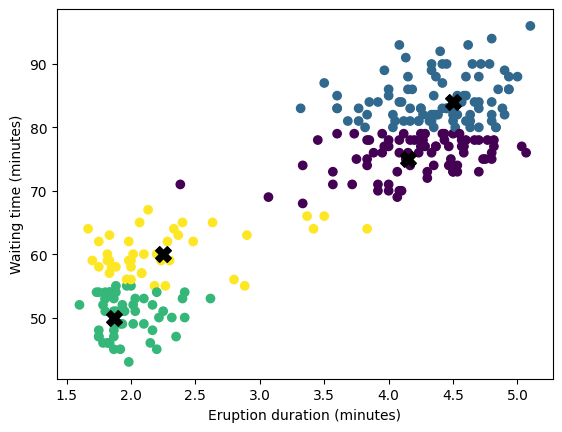

[0 2 0 3 1 3 1 1 2 1 2 1 0 2 1 2 3 1 2 0 2 2 0 0 0 1 2 0 0 0 0 0 3 1 0 2 2
 1 3 1 1 3 1 3 0 1 3 2 1 3 0 1 2 1 2 1 0 3 0 1 3 1 2 1 3 1 0 0 3 0 1 3 0 0
 3 0 3 0 0 1 0 1 0 3 0 1 0 1 2 1 3 1 2 0 3 0 1 0 2 1 3 1 2 1 1 2 1 2 1 1 0
 3 1 0 3 1 2 1 3 1 2 0 0 3 1 1 2 1 3 1 2 1 3 1 2 1 2 1 2 0 1 3 1 0 0 3 1 2
 1 2 0 0 3 1 0 0 1 1 2 1 2 1 3 0 3 0 3 1 2 1 2 3 0 0 1 1 0 2 1 0 2 0 1 1 2
 0 1 2 1 3 1 3 0 1 0 1 1 0 2 0 3 1 1 2 0 2 0 1 2 1 0 1 2 0 3 0 2 1 2 0 2 1
 2 0 0 0 0 0 0 0 0 2 1 2 1 2 2 0 0 3 0 2 1 3 1 1 3 1 3 0 2 1 0 0 1 1 0 1 3
 0 0 1 3 1 2 3 0 1 2 1 2 0]


In [ ]:
import pandas as pd

url = 'https://www.stat.cmu.edu/~larry/all-of-statistics/=data/faithful.dat'
df = pd.read_csv(url,  skiprows=26, delim_whitespace=True, header=None, names=['eruptions', 'waiting'])

df.head()
len(df)
# Convert DataFrame to NumPy array
X = df.to_numpy()

# Apply k-medoids clustering with 4 clusters
labels, centers = kmedoids(X, k=4)

# Plot data points and cluster centers
fig, ax = plt.subplots()
scatter = ax.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
centers_scatter = ax.scatter(centers[:, 0], centers[:, 1], c='black', s=120, marker='X')
ax.set_xlabel('Eruption duration (minutes)')
ax.set_ylabel('Waiting time (minutes)')
ax.add_artist(centers_scatter)
plt.show()
print(labels)



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


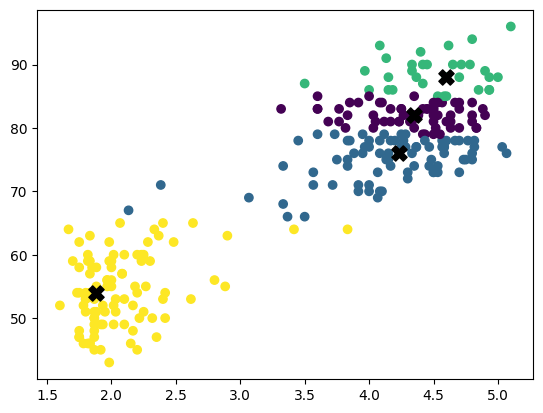

In [ ]:
!pip install scikit-learn-extra
from sklearn_extra.cluster import KMedoids
kmedoids = KMedoids(n_clusters=4, random_state=0).fit(X)
label = kmedoids.fit_predict(X)
    #Getting unique labels

fig, ax = plt.subplots()
u_labels = np.unique(label)
centers=kmedoids.cluster_centers_
scatter = ax.scatter(X[:, 0], X[:, 1], c=label, cmap='viridis')
centers_scatter = ax.scatter(centers[:, 0], centers[:, 1], c='black', s=120, marker='X')
plt.show()



